In [73]:
# Implementación de los solvers iterativos JAcobi, Gauss-Seidel y SOR junto con el de CGM.

using PyCall
using PyPlot
using BenchmarkTools

np = pyimport("numpy")
plt = pyimport("matplotlib.pyplot")

PyObject <module 'matplotlib.pyplot' from '/home/edwinheny/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [74]:
##
# Funciones para construir el sistema Ax = b. Se debe usar un número entero par
# mayor que cero.
# 

# Función para constuir la matriz A
py"""
import numpy as np
def matrizSistema( n ):
    A = np.diag(-1*np.ones(n-1), k=-1) + np.diag(3*np.ones(n)) + np.diag(-1*np.ones(n-1), k=1)
    for i in range(n):
        if i != n/2-1 and i != n/2:
            A[i][(n-1)-i] = 0.5
    return A
"""

In [75]:
# Función para construir el vector b
py"""
def vectorSistema( n ):
    b = np.zeros((n,1))
    b[0] = 2.5
    b[n-1] = 2.5
    for i in range(1,n-1):
        if i == n/2-1 or i == n/2:
            b[i] = 1
        else:
            b[i] = 1.5
    return b
"""

In [79]:
##
# Funciones que implementan los métodos de Jacobi,
# Gauss-Seidel, SOR y CGM.
##

##
# Implementación del método de Jacobi
##
py"""
def metodo_jacobi(A, D, L, U, b, x0, iterMax, tol):
    # Norma
    normres_jacobi = []
    x = x0

    for j in range(iterMax):
        x = np.linalg.inv(D).dot(b-(L+U).dot(x))
        normres_jacobi = np.concatenate((normres_jacobi, np.linalg.norm(b-A.dot(x), np.Inf)), axis=None)
        if normres_jacobi[j] <= tol:
            #print("Jacobi => Iteracion maxima: ", j+1)
            break    
    return x, normres_jacobi
"""

In [80]:
###
# Implementación del método de Gauss-Seidel
##
py"""
def metodo_gs(A, D, L, U, b, x0, iterMax, tol):
    # Norma
    normres_gs = []
    x = x0

    for j in range(iterMax):
        x = np.linalg.inv(D+L).dot(b-U.dot(x))
        normres_gs = np.concatenate((normres_gs, np.linalg.norm(b-A.dot(x), np.inf)), axis=None)
        if normres_gs[j] <= tol:
            #print("GS     => Iteracion maxima: ", j+1)
            break 
    return x, normres_gs
"""

In [81]:
##
# Implementación del método de SOR
##
py"""
def metodo_sor(A, D, L, U, b, x0, w, iterMax, tol):
    # Norma
    normres_sor = []
    x = x0

    for j in range(iterMax):
        x = np.linalg.inv(w*L + D).dot((1-w)*D.dot(x)- w*U.dot(x)) + w*np.linalg.inv(D + w*L).dot(b)
        normres_sor = np.concatenate((normres_sor, np.linalg.norm(b-A.dot(x), np.inf)), axis=None)
        if normres_sor[j] <= tol:
            #print("SOR    => Iteracion maxima: ", j+1)
            break 
    return x, normres_sor
"""

In [82]:
##
# Implementación del método de CGM
##
py"""
# Método de CGM
def metodo_cgm( A, b, x0, tol ):
    x = x0
    r = b - A.dot(x)
    d = r
    normres_cgm = []
    for k in range(len(b)):
        rTr = np.transpose(r).dot(r)
        normres_cgm = np.concatenate((normres_cgm, np.linalg.norm(b-A.dot(x), np.inf)), axis=None)
        if normres_cgm[k] <= tol:
            #print("CGM    => Iteracion maxima: ", k+1)
            break
        alpha = rTr / np.transpose(d).dot(A).dot(d)
        x = x + alpha*d
        r = r - alpha*A.dot(d)
        betha = np.transpose(r).dot(r)/rTr
        d = r + betha*d
    return x, normres_cgm
"""

In [85]:
##
# Experimento Numérico
##

#Aquí se cambia el tamaño para obtener la matriz A y el vector b.
# Solo ingresar números enteros positivos pares.
A = py"matrizSistema"( 100 )
b = py"vectorSistema"( 100 )
iterMax = 10000000
tol = 1e-8
w = 1.13

# Descomposición A = D + L + U
D =  np.diag(np.diag(A))
L = np.tril(A,k=-1)
U = np.triu(A,k=1)

# Vector inicial x0
x0 = np.zeros((np.size(b),1));

In [84]:
##
# En este apartado se muestra el numéro de la iteración donde alcanza convergencia
# cada uno de los métodos y además arroja el error, el residuo más pequeño obtenido.
# xJ: solución aproximada Jacobi
# xGS: solución aproximada Gaus-Seidel
# xSOR: solución aproximada SOR
# xCGM: solución aproximada CGM
# normres_nombre-método: vector con los residuos obtenidos.

xJ, normres_jacobi = py"metodo_jacobi"(A, D, L, U, b, x0, iterMax, tol)
xGS, normres_gs = py"metodo_gs"(A, D, L, U, b, x0, iterMax, tol)
xSOR, normres_sor = py"metodo_sor"(A, D, L, U, b, x0, w, iterMax, tol)
xCGM, normres_cgm = py"metodo_cgm"(A, b, x0, tol);

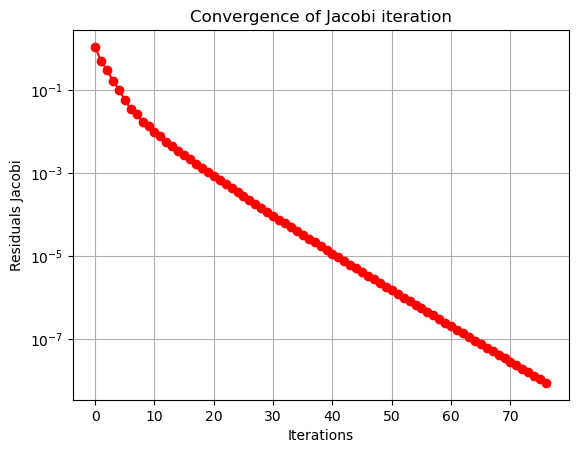

PyObject Text(0.5, 1.0, 'Convergence of Jacobi iteration')

In [77]:
##
# En este apartado se realizan las gráficas de los residuos vs las iteraciones.
##
plt.plot(normres_jacobi, color="red", "o-")
plt.grid(linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Residuals Jacobi")
plt.yscale("log")
plt.title("Convergence of Jacobi iteration")

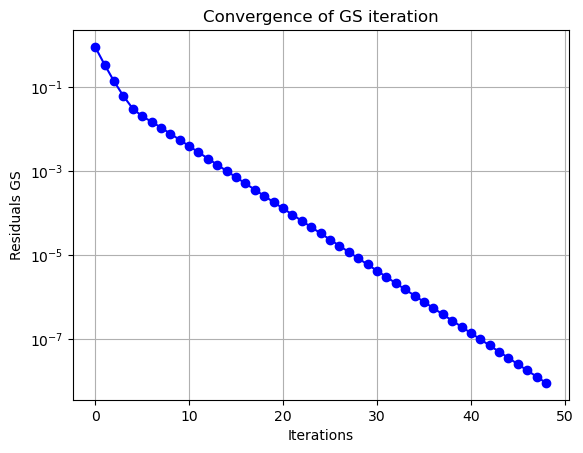

PyObject Text(0.5, 1.0, 'Convergence of GS iteration')

In [33]:
plt.plot(normres_gs, color="blue", "o-")
plt.grid(linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Residuals GS")
plt.yscale("log")
plt.title("Convergence of GS iteration")

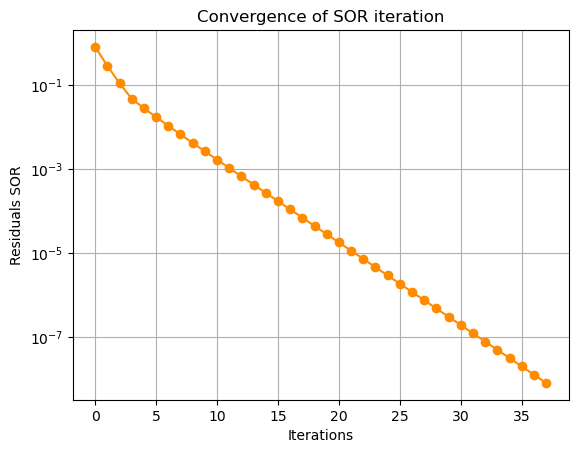

PyObject Text(0.5, 1.0, 'Convergence of SOR iteration')

In [34]:
plt.plot(normres_sor, color="darkorange", "o-")
plt.grid(linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Residuals SOR")
plt.yscale("log")
plt.title("Convergence of SOR iteration")

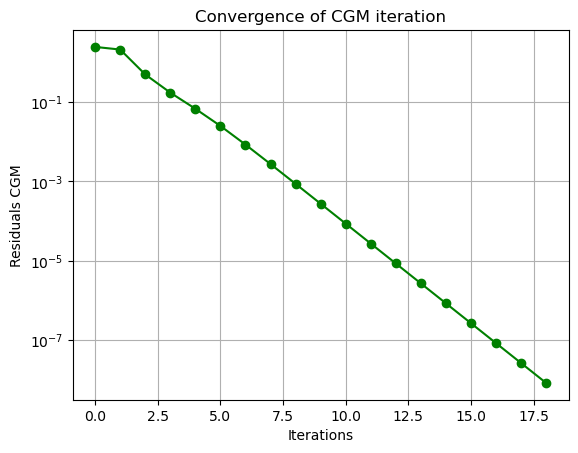

PyObject Text(0.5, 1.0, 'Convergence of CGM iteration')

In [35]:
plt.plot(normres_cgm, color="green", "o-")
plt.grid(linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Residuals CGM")
plt.yscale("log")
plt.title("Convergence of CGM iteration")

In [78]:
##
# En este apartado se realiza el análisis de los tiempos de ejecución.
##
BenchmarkTools.DEFAULT_PARAMETERS.samples = 100
@benchmark py"metodo_jacobi"(A, D, L, U, b, x0, iterMax, tol)

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  11.673 ms … 124.644 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     16.513 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   18.092 ms ±  11.496 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

   █    ▃     ▆   ▂    ▂                                        
  ▇█▇█▄▅█▇█▅▇▅█▅▅▇██▅█▇█▇▇▇▁▁▁▄▄▄▄▁▁▄▁▁▁▁▁▁▄▁▁▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄ ▄
  11.7 ms         Histogram: frequency by time         33.4 ms <

 Memory estimate: 6.92 KiB, allocs estimate: 108.

In [70]:
@benchmark py"metodo_gs"(A, D, L, U, b, x0, iterMax, tol)

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):   7.342 ms … 28.026 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     11.035 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   10.935 ms ±  2.332 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

                       ▃▃▆    ▁  ▁▃  █ ▃▃█  ▁▁▁                
  ▄▄▁▄▇▁▇▄▄▄▄▇▇▄▁▇▇▄▁▁▄███▇▇▄▁█▄▄██▇▇█▄███▁▁███▇▇▇▇▁▁▁▁▁▄▄▄▁▇ ▄
  7.34 ms         Histogram: frequency by time          14 ms <

 Memory estimate: 6.70 KiB, allocs estimate: 108.

In [71]:
@benchmark py"metodo_sor"(A, D, L, U, b, x0, w, iterMax, tol)

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  10.926 ms … 31.534 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     14.188 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   14.602 ms ±  2.474 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

            ▂  ▆ ▂ █ ▂ ▂ █ ▂       ▂▂ ▂                        
  ▄▁▁▁▆▄█▁▆██▆▁█▄█▆███▄█▄█▄█▄▆▁▆▆▆▁██▆█▄▁▄▄▆▄▁▁▆▄▄▁▄▄▁▁▁▁▁▁▁▄ ▄
  10.9 ms         Histogram: frequency by time        19.6 ms <

 Memory estimate: 6.75 KiB, allocs estimate: 112.

In [72]:
@benchmark py"metodo_cgm"(A, b, x0, tol)

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  725.700 μs …   1.691 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     801.700 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   906.892 μs ± 224.116 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▄ █ ▂▂                                                         
  █▅█▄██▅▅▃▃▃▃▄▃▃▃▃▃▄▁▃▄▁▁▁▁▃▁▃▃▄▃▁▁▁▁▁▃▁▃▁▄▃▃▁▁▁▃▄▃▃▁▁▁▁▁▁▁▁▁▃ ▃
  726 μs           Histogram: frequency by time         1.57 ms <

 Memory estimate: 5.17 KiB, allocs estimate: 89.